In [ ]:
# Проводим A-B тестирования нового алгоритма приложения доставки продуктов
#
# Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
# Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
sns.set_theme(font_scale = 1, 
              style = 'whitegrid', 
              rc = {'figure.figsize': (10, 5)}
)

In [2]:
delivery = pd.read_csv('experiment_lesson_4.csv')
delivery.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.2+ KB


In [39]:
control = delivery.query('experiment_group == "control"').delivery_time
test = delivery.query('experiment_group == "test"').delivery_time

Text(0.5, 1.0, 'Control_group\n')

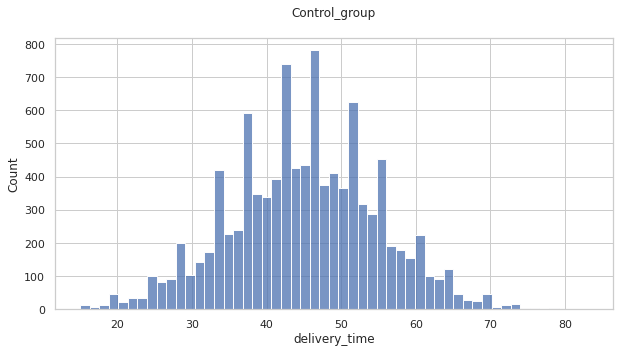

In [35]:
# Посмотрим на форму распределения времени доставки в контрольной и эксперементальной группах
ax = sns.histplot(control)
ax.set_title('Control_group\n')

Text(0.5, 1.0, 'Experiment_group\n')

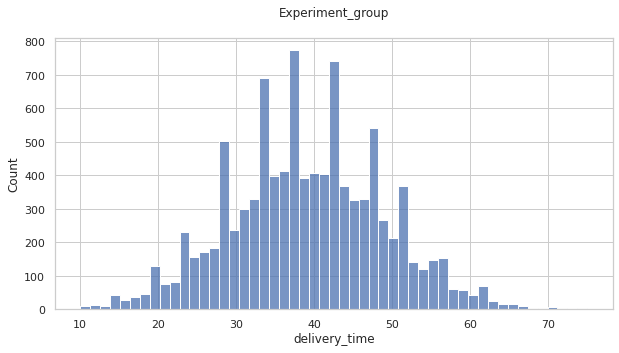

In [36]:
ay = sns.histplot(test)
ay.set_title('Experiment_group\n')

In [38]:
# Проверим разницу в количестве наблюдений в группах
abs(test.count() - control.count())

12

In [40]:
# Проверим нормальность распределения в группах при помощи теста Агостино-Пирсона по функции
# scipy.stats.normaltest()
ss.normaltest(test)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [41]:
ss.normaltest(control)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [ ]:
# В тестовой группе pvalue < 0 позволяет отклонить H0 о нормальности распределения в группе, 
# однако если посмотреть на саму форму распределения, то оно не настолько сильно нарушает нормальность, 
# чтобы об этом беспокоиться на таком размере выборки! Поэтому не переживаем

In [42]:
# Проверим однородность стандартных отклонений в двух выборках
np.std(test)

9.882819260031342

In [43]:
np.std(control)

9.989522000652327

In [44]:
# Для сравнения средних в данных экспериментальных группах я использую STUDENT'S T-TEST
# Статистика в тесте равна -43, p-value <= 0.05
ss.ttest_ind(test, control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [49]:
# Посмотрим на сколько процентов изменилось среднее время доставки в тестовой группе
(control.mean()-test.mean()) / (control.mean()/100)

13.354653121660812

In [ ]:
# Вывод: раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. 
# Среднее время доставки в тесте меньше, чем в контроле.